## 사이킷런으로 수행하는 타이타닉 생존자 예측

* 캐글에서 제공하는 타이타닉 탑승자 데이터 기반으로
* 생존자 예측을 사이킷런으로 수행

* 타이타닉 생존자 데이터
    - 머신러닝에 입문하는 데이터 분석가/과학자를 위한 기초 예제로 제공
    - 많은 캐글 이용자가 자신의 방법으로 타이타닉 생존자 예측을 수행하고
    - 수행 방법을 캐글에 공유

* 캐글 : 데이터 분석 오픈 포탈
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관
    
캐글사이트 : https://www.kaggle.com/c/titanic/data
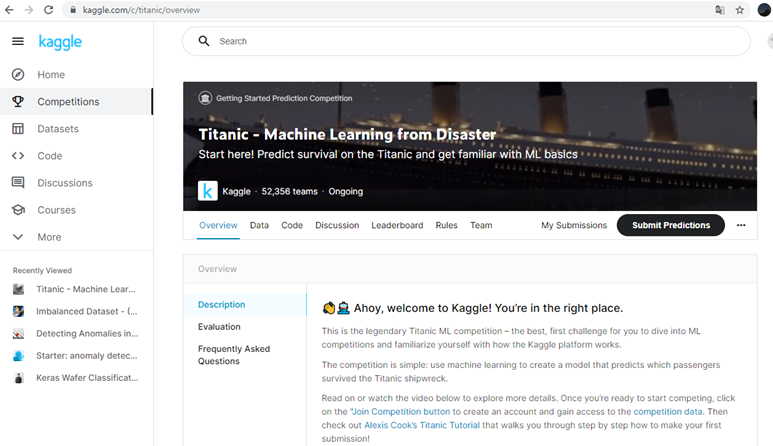

사이킷런으로 수행하는 타이타닉 생존자 예측 과정
* 데이터 정보 확인
* 데이터 가공 (전처리)
    - Null 값 처리
    - Cabin 값 조정
    - 생존자 파악 (성별 / 객실등급별 / 연령별)
    - 레이블 인코딩
    - 모든 가공 내역을 함수로 작성
* 생존자 예측 프로세스
    - 클래스 결정값 데이터 세트 만들기
    - 학습 /테스트 데이터 세트 분리 (20%)
    - 예측 수행
    - 교차 검증

데이터 다운로드
* https://www.kaggle.com/c/titanic/data

## 변수 별 정보

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

(891, 12)

In [26]:
# 데이터 칼럼 타입 확인



 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


데이터 정보 확인
- RangeIndex: 891 entries, 0 to 890 : 전체 행 (891개 행)
- Data columns (total 12 columns): 칼럼 수 (12개)
- float64 : 2개
- int64 : 5개
- object(string) : 5개
 - (판다스는 넘파이 기반으로 만들어졌는데
 - 넘파이의 String 타입의 길이 제한이 있기 때문에 
 - 이에 대한 구분을 위해 object 타입으로 명기)
- Age : 714개 (Null값(NaN): 177개)
- Cabin : 204개 (Null값(NaN): 687개)
- Embarked : 889개 (Null값(NaN): 2개)

## 결측치 파악

In [27]:
# Null 값 개수 확인


177

687

2

##  데이터 전처리 : 결측치 처리

### NULL 컬럼들에 대한 처리

- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로
- Null 값을 어떻게 처리할지 결정
- DataFrame()의 fillna() 메서드를 사용해서 
- Null 값을 평균 또는 고정 값으로 변경
- Age : 평균 나이로 변경
- 나머지 칼럼 : 'N'으로 변경

In [31]:
# Null 처리



# 모든 칼럼의 Null 값을 합산해서 Null 값이 없는지 확인


각 칼럼의 Null 값 갯수  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
데이터 세트 Null 값 갯수  0


### 문자열 변수(피처) 빈도 분포 확인 : value_counts()

In [32]:
# 문자열 피처 (Sex, Cabin, Embarked) 값 분류 확인


Sex분포: 
 male      577
female    314
Name: Sex, dtype: int64

Cabin분포: 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
B4               1
B71              1
A14              1
E40              1
D49              1
Name: Cabin, Length: 148, dtype: int64

Embarked분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### 문자열 변수 Cabin값 변경

In [33]:
# Cabin 칼럼 값 중에서 첫 번째 문자만 추출


0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [34]:
# Cabin 값을 선실등급만으로 표기 (선실 번호 제외)


# 선실등급 별 개수 확인


0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자수 분포(EDA)

머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인
- 성별에 따른 생존자 수 비교

In [35]:
# 성별(Sex) 분포 확인


# 생존(Survived) 분포 확인


Survived
0    549
1    342
Name: Survived, dtype: int64

In [36]:
# 성별(Sex) 생존(Survived) 확인
# 사망 : 0
# 생존 : 1
# Survived 칼럼 : 레이블로 결정 클래스 값


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

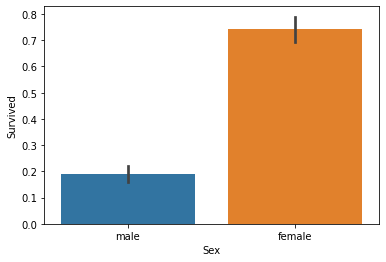

In [37]:
# 성별 생존자 : 막대 그래프 (barplot)


참고 
* 검은 선
* 오차막대 (error bar) : 부트 스트랩 신뢰구간(Bootstrap confidence intervals)
* 기본값 :  95(5프로의 오차범위)
* 표준편차를 표현하고 싶다면 sns.barplot() 안에 ci="sd"
* sns.barplot(x='Sex', y = 'Survived', data=titanic_df, ci="sd")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

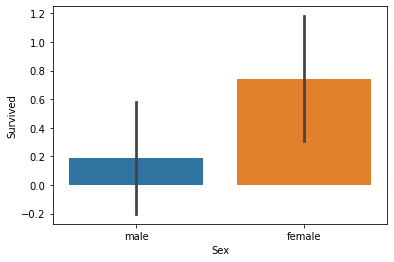

In [38]:
# 참고


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

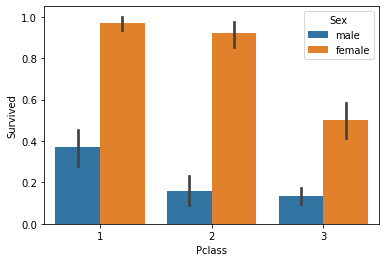

In [39]:
# 객실 등급별/성별 생존 확률


## 데이터 전처리 : 구간화(binning)

### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화(binning)

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [44]:
# 연령별(Age) 생존 확률 확인

# Age의 값 종류가 많기 때문에 범위별로 분류해 카테고리 값 할당


# 입력 age에 따라 구분값을 반환하는 함수 설정. 
# DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'        # -1 이하 오류 값
    elif age <= 5: cat = 'Baby'          # 0~5세 
    elif age <= 12: cat = 'Child'        # 6~12세
    elif age <= 18: cat = 'Teenager'     # 13~18세
    elif age <= 25: cat = 'Student'      # 19~25세
    elif age <= 35: cat = 'Young Adult'  # 26~35
    elif age <= 60: cat = 'Adult'        # 36~60
    else : cat = 'Elderly'               # 61세 이상
    
    return cat

In [45]:
# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

<Figure size 720x432 with 0 Axes>

In [46]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [47]:
# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환


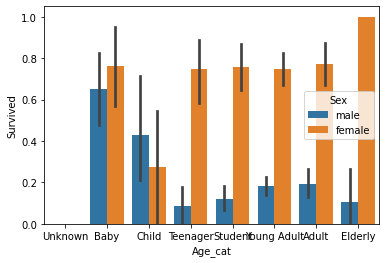

'Child'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 데이터 전처리 : 인코딩

### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
* 인코딩 : 사이킷런의 LabelEncoder 클래스 이용해서 레이블 인코딩 적용
* 0 ~ (카테고리 유형수 -1) 숫자 값으로 변환
* fit() / transform() 메서드 사용

In [52]:
from sklearn import preprocessing

# 레이블 인코딩 함수




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 데이터 전처리 : 삭제
- PassengerId, Name, Ticket 변수 삭제
- drop(labels=None, axis=0, inplace=False) 함수 사용

In [53]:
# 불필요한 변수 제거 drop()함수 : PassengerId, Name, Ticket 변수



In [54]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


###### 지금 까지 가공한내용을  정리하고 함수로 작성 (재사용 가능) #######

In [55]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


---

## 생존자 예측 프로세스

### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

### 2단계. 데이터 전처리
- 피처 데이터 세트에 transform_features()를 적용해 데이터 가공

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


### 3단계. Data Split : 학습 데이터/테스트 데이터

In [58]:
# 학습 / 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%
from sklearn.model_selection import train_test_split


### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

* 3개의 ML 알고리즘 수행  
     - 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
* 이 3개의 알고리즘으로 예측 수행하고 
* 교차 검증으로 평가

사이킷런 클래스
* 결정 트리 : DecisionTreeClassifier
* 랜덤 포레스트 : RandomForestClassifier
* 로지스틱 회귀 : LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
* 머신러닝 모델을 학습하고(fit), 예측 수행(predict)
* 예측 성능 평가 :  정확도 (accuracy_score() 사용)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성

# DecisionTreeClassifier 학습/예측/평가

# RandomForestClassifier 학습/예측/평가


# LogisticRegression 학습/예측/평가


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


### 5단계. 교차 검증을 통한 모델 성능 향상
: 결정 트리 모델 좀 더 평가
* 사이킷런 model_selection 패키지의 
    - KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용

In [60]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행 
# 폴드 개수 : 5
from sklearn.model_selection import KFold




교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


### 6단계. 하이퍼파라미터 튜닝

In [66]:
# GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

# DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 에측 성능 측정
# CV : 5개의 폴드 세트 지정
# 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf 

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정



GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
